### Exemplo de aprendizagem não supervisionada: Dimensionalidade de Iris

Como exemplo de problema de aprendizagem não supervisionado, veremos como reduzir a dimensionalidade dos dados de Iris para facilitar a visualização. 

O conjunto de dados Iris tem quatro dimensões: há quatro features medidas para cada observação (sample).

A tarefa de redução da dimensionalidade é investigar se existe uma representação apropriada de baixa dimensionalidade que mantenha as características essenciais do conjunto de dados original. 

Frequentemente, a redução da dimensionalidade é usada como ajuda para visualizar os dados: afinal, é muito mais fácil traçar os dados em duas dimensões que em quatro ou mais. 

Neste exemplo, será usado o Principal Component Analysis (PCA), que é uma técnica rápida de redução linear da dimensionalidade. 
O modelo retornará dois componentes, ou seja, uma representação bidimensional dos dados. 

In [6]:
#importando biblioteca de visualização de dados e numpy
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

#jupyter magic command para que não precisemos chamar o .show() em cada plot
%matplotlib inline 

In [7]:
iris = sns.load_dataset('iris') #importando o dataframe direto do seaborn

In [23]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
X_iris = iris[['sepal_length', ]]

In [9]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [10]:
# 1. Selecionar a classe de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar o modelo com hiperparâmetros
model = PCA(n_components=2)

# 3. Ajustar aos dados. Observar que não especificamos “y” 
model.fit(X_iris)

# 4. Transformar os dados em duas dimensões
X_2D = model.transform(X_iris)

In [11]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
X_2D[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [17]:
y_iris = iris['species']
y_iris.shape

(150,)

Traçando os resultados. Uma forma rápida de fazer isso é inserir os resultados no ``DataFrame`` original de Iris e usar o método ``lmplot`` de Seaborn para mostrar os resultados:

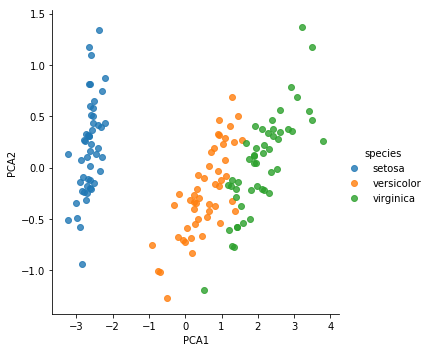

In [15]:
iris_pca = iris.copy(deep=True)
iris_pca['PCA1'] = X_2D[:, 0]
iris_pca['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris_pca, fit_reg=False);

Na representação em duas dimensões, as espécies estão relativamente bem separadas, ainda que o algoritmo PCA não tivesse conhecimento das tags das espécies de flores! 

Isso indica que uma classificação relativamente simples deveria funcionar com esse conjunto de dados, como visto no exercício anterior.

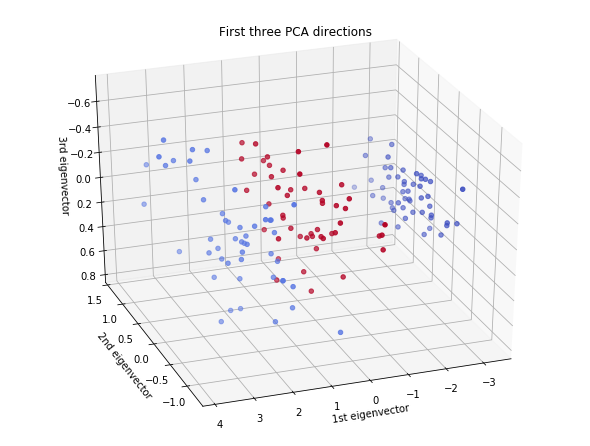

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Podemos também reduzir as 4 dimensões originais para 3 por exemplo e plotar um gráfico em 3d:
iris = sns.load_dataset('iris')

X = X_iris
Y = y_iris
z = {'setosa': 5, 'versicolor': 25, 'virginica': 7}

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_iris)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y.map(z),
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")

ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

### Aprendizagem não supervisionada: Clustering com Iris

Aplicando um algoritmo de clustering ao conjunto de dados Iris.

Um algoritmo de clustering tenta encontrar grupos diferentes sem fazer referência a tags nos dados. 

Será usado um método avançado de clustering chamado Gaussian Mixture Model (GMM). 
O GMM tenta modelar os dados como uma coleção de subgrupos Gaussianos. 

Pode-se ajustar o GMM da seguinte forma:

In [19]:
# 1. Escolhemos a classe de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos o modelo com hiperparâmetros
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. Ajustamos aos dados. Observar que “y” não é especificado
model.fit(X_iris)

# 4. Definimos os nomes dos clusters
y_gmm = model.predict(X_iris)  

In [20]:
iris_pca['cluster'] = y_gmm
iris_pca

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1
5,5.4,3.9,1.7,0.4,setosa,-2.280860,0.741330,1
6,4.6,3.4,1.4,0.3,setosa,-2.820538,-0.089461,1
7,5.0,3.4,1.5,0.2,setosa,-2.626145,0.163385,1
8,4.4,2.9,1.4,0.2,setosa,-2.886383,-0.578312,1
9,4.9,3.1,1.5,0.1,setosa,-2.672756,-0.113774,1


Adicionando os "titulos" dos clusters ao ``DataFrame`` Iris e usar Seaborn para traçar os resultados:

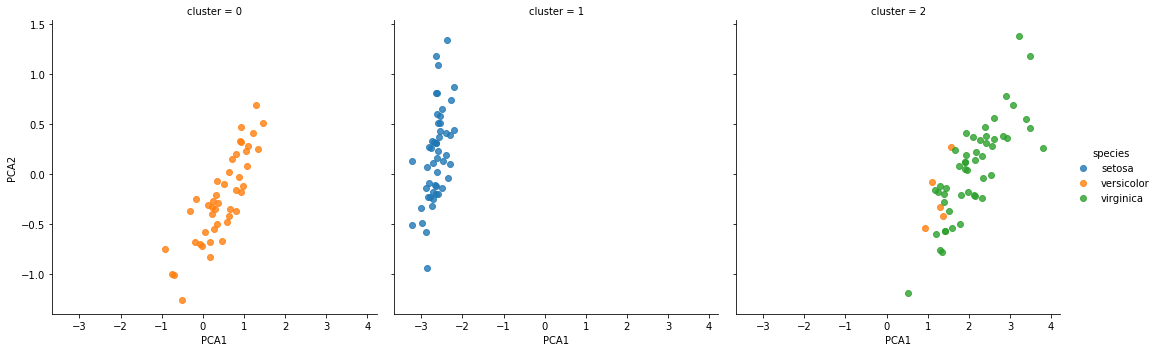

In [21]:
sns.lmplot("PCA1", "PCA2", data=iris_pca, hue='species', col='cluster', fit_reg=False);

Depois de separar os dados por número de cluster, vemos exatamente o grau de eficiência com que o algoritmo GMM recuperou os grupos subjacente: a espécie *setosa* é separada perfeitamente dentro do cluster 1, embora apareça uma pequena parte misturada entre *versicolor* e *virginica*. 

Isso significa que mesmo sem um especialista que nos diga as classificações de cada flor, as medidas dessas observações são suficientemente diferentes para que seja possível identificar *automaticamente* a presença desses diferentes grupos de espécies com um simples algoritmo de clustering. 

Esse tipo de algoritmo poderia até dar aos especialistas na disciplina algumas pistas sobre as relações entre as amostras observadas (??).

## Resumindo

Nesta seção, abordamos as características essenciais da representação de dados em Scikit-Learn e a API de estimadores. 

Sem importar o tipo de estimador, o mesmo padrão de importar/instanciar/ajustar/prever se mantém em todos os casos. 

Com essas novas informações sobre a API de estimadores, você pode explorar a documentação de Scikit-Learn e começar a testar vários modelos sobre os dados. 